# Percolation cluster stats

In [1]:
%matplotlib widget

from os import path
import pickle
import numpy as np
from numba import njit
from qcnico.plt_utils import histogram

#@njit
def get_dcrits(run_inds,temps,datadir):
    nsamples = len(run_inds)
    ntemps = len(temps)
    dcrits = np.zeros((nsamples,ntemps))
    for k in range(nsamples):
        for l in range(ntemps):
            sampdir = f"sample-{run_inds[k]}"
            pkl = f"out_percolate-{temps[l]}K.pkl"
            fo = open(path.join(datadir,sampdir,pkl),'rb')
            dat = pickle.load(fo)
            dcrits[k,l] = dat[1]
            fo.close()

    return dcrits

datadir=path.expanduser("~/Desktop/simulation_outputs/percolation/40x40/percolate_output")
fgood_runs = path.join(datadir, 'good_runs.txt')
with open(fgood_runs) as fo:
    lines = fo.readlines()

#gr_inds = list(map(int,[line.rstrip().lstrip().split('-')[1] for line in lines]))
gr_inds = list(map(int,[line.rstrip().lstrip() for line in lines]))

# temps = np.arange(0,1050,50)
# temps[0] = 10
temps = np.arange(40,440,10)

dcrits = get_dcrits(gr_inds,temps, datadir)
print(dcrits.shape)

davg_T = np.mean(dcrits,axis=0)
dstd_T = np.std(dcrits,axis=0)
print(davg_T.shape)




(174, 40)
(40,)


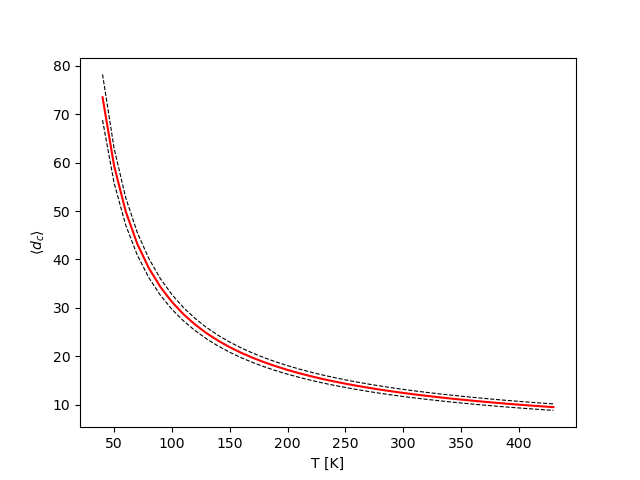

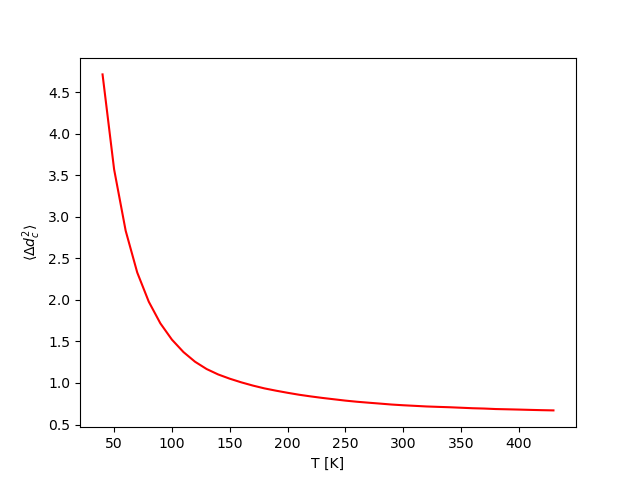

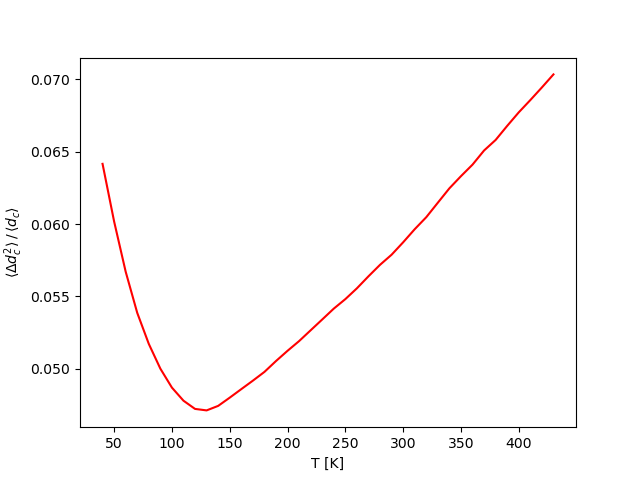

[4.71348601 3.57090315 2.83231283 2.32964396 1.97783568 1.71789396
 1.52180332 1.37202727 1.25579044 1.1681345  1.10283164 1.05190537
 1.00784257 0.96901618 0.9352214  0.9076019  0.88221247 0.85869177
 0.83876069 0.82056223 0.80430212 0.78807464 0.77439919 0.76299713
 0.75207754 0.74076481 0.73219912 0.72507325 0.71772907 0.71280036
 0.70826608 0.70231829 0.69634408 0.69258043 0.68655133 0.68347059
 0.68016663 0.67639524 0.67302773 0.67025189]


In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(temps,davg_T,'r-')
ax.plot(temps,davg_T+dstd_T,'k--',lw=0.8)
ax.plot(temps,davg_T-dstd_T,'k--',lw=0.8)
ax.set_xlabel('T [K]')
ax.set_ylabel('$\langle d_{c}\\rangle$')
plt.show()

fig, ax = plt.subplots()
ax.plot(temps,dstd_T,'r-')
ax.set_xlabel('T [K]')
ax.set_ylabel('$\langle \Delta d_c^2\\rangle$')
plt.show()

fig, ax = plt.subplots()
ax.plot(temps,dstd_T/davg_T,'r-')
ax.set_xlabel('T [K]')
ax.set_ylabel('$\langle \Delta d_c^2\\rangle\,/\,\langle d_{c}\\rangle$')
plt.show()


print(dstd_T)

[ 0  5 10 15 20 25 30 35]
[plt_utils.histogram] dx = 0.9666312971627281
[plt_utils.histogram] dx = 0.4367384451887926
[plt_utils.histogram] dx = 0.29983441819279505
[plt_utils.histogram] dx = 0.2687195580968508
[plt_utils.histogram] dx = 0.25021571168699386
[plt_utils.histogram] dx = 0.22551574659116524
[plt_utils.histogram] dx = 0.2080306130339565
[plt_utils.histogram] dx = 0.19505058267917572


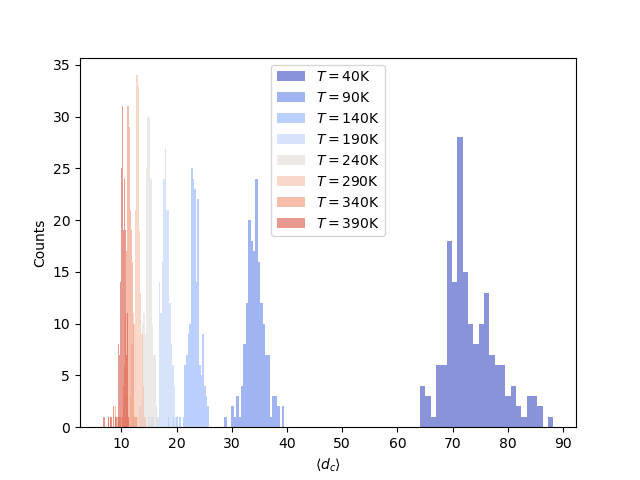

In [13]:
from qcnico import plt_utils

Tcm = plt_utils.get_cm(temps,'coolwarm',max_val=1.0)

fig, ax = plt.subplots()

plot_inds = np.arange(0,40,5)
print(plot_inds)

for n in plot_inds:
    plt_utils.histogram(dcrits[:,n],nbins=25,show=False, normalised=False, plt_objs=(fig,ax),
        plt_kwargs={'alpha': 0.6, 'color': Tcm[n], 'label': f'$T = {temps[n]}$K'})
ax.set_xlabel('$\langle d_{c}\\rangle$')
plt.legend()
plt.show()

In [4]:
def get_sigma(dcrits,nbins=30):
    hist, bin_edges = np.histogram(dcrits,bins=nbins,density=True)
    bin_inds = np.sum(dcrits[:,None] > bin_edges,axis=1) - 1
    f = hist[bin_inds] * np.exp(-dcrits)
    return np.max(f)

sigmas = np.array([get_sigma(d) for d in dcrits.T])
print(sigmas.shape)
dat = np.vstack((temps, sigmas))
print(dat)
np.save("sigma_v_T.npy",dat)

(40,)
[[4.00000000e+01 5.00000000e+01 6.00000000e+01 7.00000000e+01
  8.00000000e+01 9.00000000e+01 1.00000000e+02 1.10000000e+02
  1.20000000e+02 1.30000000e+02 1.40000000e+02 1.50000000e+02
  1.60000000e+02 1.70000000e+02 1.80000000e+02 1.90000000e+02
  2.00000000e+02 2.10000000e+02 2.20000000e+02 2.30000000e+02
  2.40000000e+02 2.50000000e+02 2.60000000e+02 2.70000000e+02
  2.80000000e+02 2.90000000e+02 3.00000000e+02 3.10000000e+02
  3.20000000e+02 3.30000000e+02 3.40000000e+02 3.50000000e+02
  3.60000000e+02 3.70000000e+02 3.80000000e+02 3.90000000e+02
  4.00000000e+02 4.10000000e+02 4.20000000e+02 4.30000000e+02]
 [3.79456176e-30 4.43207661e-25 2.45871339e-21 1.31942000e-18
  1.47896279e-16 1.17460532e-14 2.25290625e-13 2.54282065e-12
  1.92693191e-11 1.07419889e-10 4.70279886e-10 4.24095727e-09
  5.06181695e-09 6.60514372e-09 1.54972343e-08 3.32392948e-08
  6.60708778e-08 1.23013943e-07 2.16463294e-07 3.68035647e-07
  6.01501470e-07 9.45700805e-07 1.43670037e-06 2.11697411e-06
 

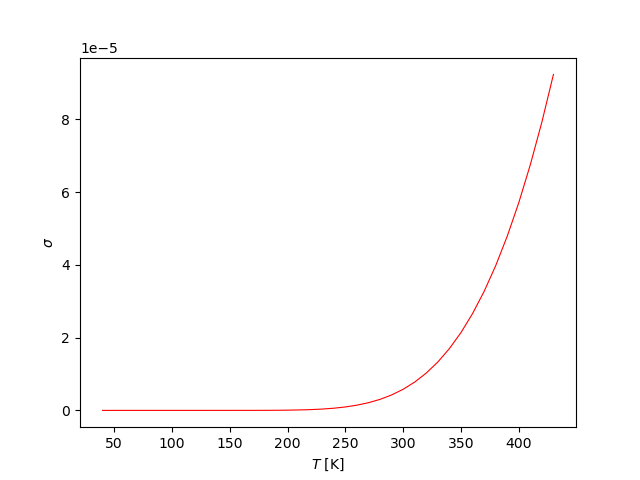

In [5]:
fig, ax  = plt.subplots()

ax.plot(temps,sigmas,'r-',lw=0.8)
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$\sigma$')
plt.show()

0D Mott VRH: slope = -2610.130612825655, r^2 = 0.9992278874533475


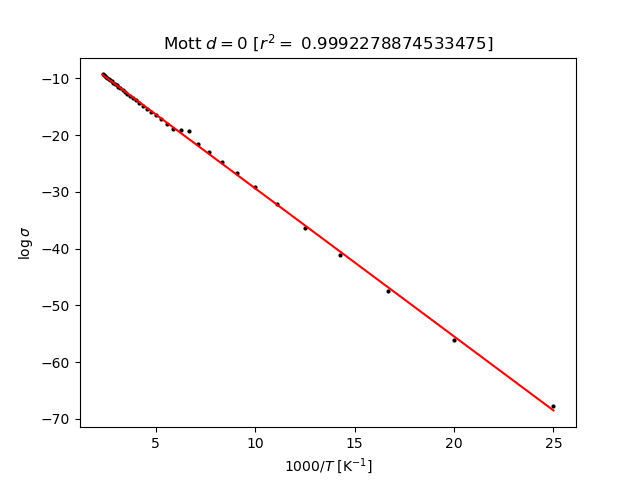

2D Mott VRH: slope = -4219576.732629159, r^2 = 0.78169469315768


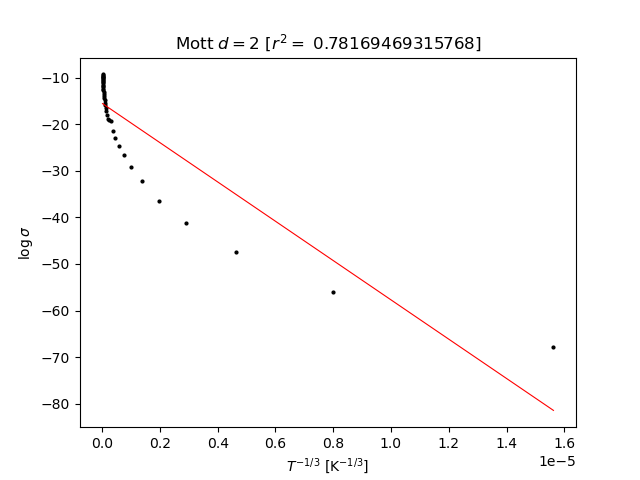

RCH: slope = 19.867006678754944, r^2 = 0.8916197843980898


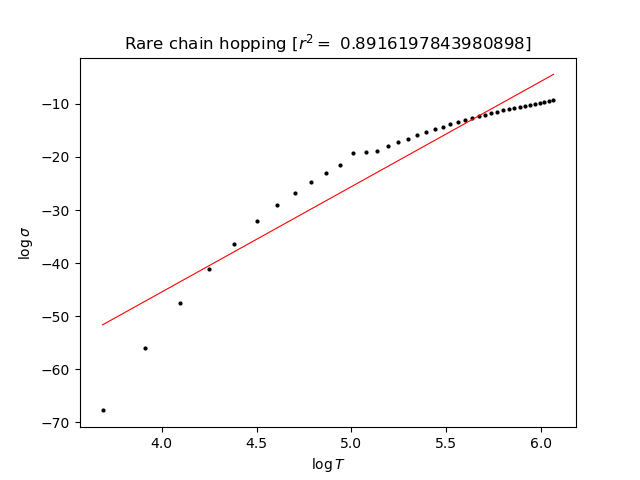

In [6]:
from scipy.stats import linregress

# Do Mott linear regression d = 0
slope, intercept, r, *_ = linregress(1.0/temps, np.log(sigmas))
print(f'0D Mott VRH: slope = {slope}, r^2 = {r**2}')
fig, ax = plt.subplots()
ax.plot((1000.0/temps),np.log(sigmas),'ko',ms=2.0)
ax.plot((1000.0/temps), (1.0/temps)*slope + intercept,'r-')
ax.set_xlabel("$1000/T$ [K$^{-1}$]")
ax.set_ylabel("$\log \sigma$")
#ax.set_yscale('log')
ax.set_title(f'Mott $d=0$ [$r^2 = $ {r**2}]')
plt.show()

# Do Mott linear regression d = 2
x = np.power(1.0/temps,3)
slope, intercept, r, *_ = linregress(x, np.log(sigmas))
print(f'2D Mott VRH: slope = {slope}, r^2 = {r**2}')
fig, ax = plt.subplots()
ax.plot(x,np.log(sigmas),'ko',ms=2.0)
ax.plot(x,intercept + slope*x,'r-',lw=0.8)
ax.set_xlabel("$T^{-1/3}$ [K$^{-1/3}$]")
ax.set_ylabel("$\log \sigma$")
#ax.set_yscale('log')
ax.set_title(f'Mott $d=2$ [$r^2 = $ {r**2}]')
plt.show()

# Do RCH linear regression
x = np.log(temps)
slope, intercept, r, *_ = linregress(x, np.log(sigmas))
print(f'RCH: slope = {slope}, r^2 = {r**2}')
fig, ax = plt.subplots()
ax.plot(x,np.log(sigmas),'ko',ms=2.0)
ax.plot(x,intercept + slope*x,'r-',lw=0.8)
ax.set_xlabel("$\log T$")
ax.set_ylabel("$\log \sigma$")
#ax.set_yscale('log')
ax.set_title(f'Rare chain hopping [$r^2 = $ {r**2}]')
plt.show()


In [7]:
def get_cluster_stats(run_inds,temps,datadir):
    nsamples = len(run_inds)
    ntemps = len(temps)
    avg_sizes = np.zeros((nsamples,ntemps),dtype=int)
    min_sizes = np.zeros((nsamples,ntemps),dtype=int)
    max_sizes = np.zeros((nsamples,ntemps),dtype=int)
    nclusters = np.zeros((nsamples,ntemps),dtype=int)
    for k in range(nsamples):
        #print(f"******* {run_inds[k]} *******")
        for l in range(ntemps):
            sampdir = f"sample-{run_inds[k]}"
            pkl = f"out_percolate-{temps[l]}K.pkl"
            fo = open(path.join(datadir,sampdir,pkl),'rb')
            dat = pickle.load(fo)
            clusters = dat[0]
            #print(f"T = {temps[l]}K: ",clusters)
            nclusters[k,l] = len(clusters)
            if len(clusters) == 0:
                sizes = 0
                print(run_inds[k], temps[l])
            else:
                sizes = np.array([len(c) for c in clusters])
            avg_sizes[k,l] = np.mean(sizes)
            min_sizes[k,l] = np.min(sizes)
            max_sizes[k,l] = np.max(sizes)
            fo.close()
            #print('\n')

    return nclusters, avg_sizes, min_sizes, max_sizes

nclusters, avgs, maxs, mins = get_cluster_stats(gr_inds,temps,datadir)

25 150
104 80
123 40
161 130
188 80
239 70


In [8]:
print('Only single clusters found: ', np.all(nclusters<2))

# There is only one cluster per sample at each temperature
sizes = avgs
avgs = np.mean(sizes,axis=0)
stds = np.std(sizes,axis=0)



Only single clusters found:  True


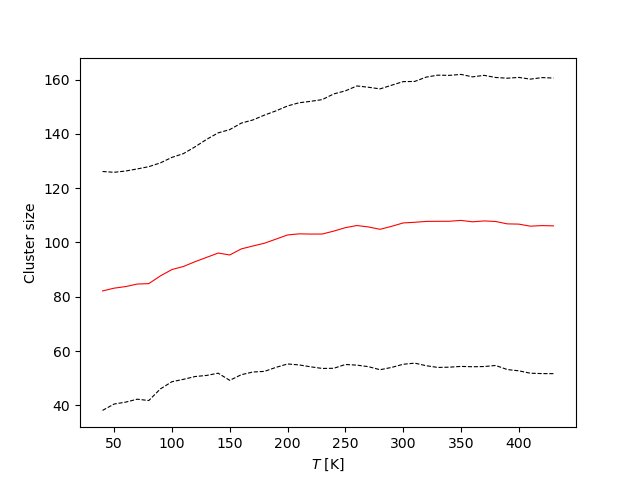

In [9]:
fig, ax = plt.subplots()
ax.plot(temps, avgs,'r-',lw=0.8)
ax.plot(temps, avgs + stds,'k--',lw=0.8)
ax.plot(temps, avgs - stds,'k--',lw=0.8)
ax.set_xlabel("$T$ [K]")
ax.set_ylabel("Cluster size")
plt.show()

[ 0 10 20 30 39]
[plt_utils.histogram] dx = 7.8
[plt_utils.histogram] dx = 7.76
[plt_utils.histogram] dx = 7.64
[plt_utils.histogram] dx = 8.48
[plt_utils.histogram] dx = 8.48


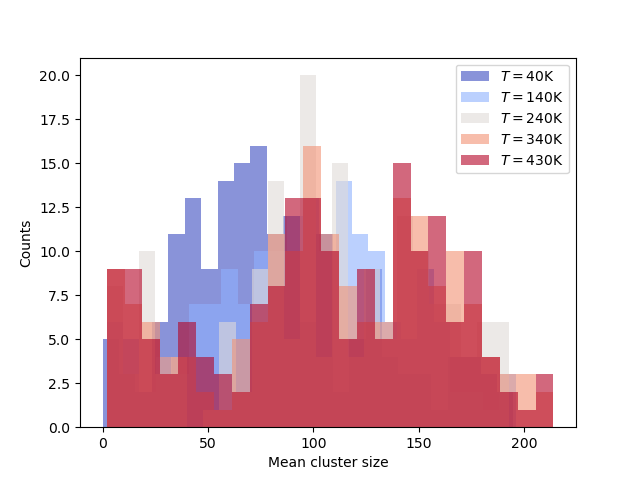

In [10]:
Tcm = plt_utils.get_cm(temps,'coolwarm',max_val=1.0)

fig, ax = plt.subplots()

plot_inds = np.arange(0,50,10)
plot_inds[-1] = 39
print(plot_inds)

for n in plot_inds:
    plt_utils.histogram(sizes[:,n],nbins=25,show=False, normalised=False, plt_objs=(fig,ax),
        plt_kwargs={'alpha': 0.6, 'color': Tcm[n], 'label': f'$T = {temps[n]}$K'})
ax.set_xlabel('Mean cluster size')
plt.legend()
plt.show()

[[45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45
  45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]]
0
{163, 142}
[[369.97126875 350.30316375]
 [369.97126875 350.30316375]]
[163]


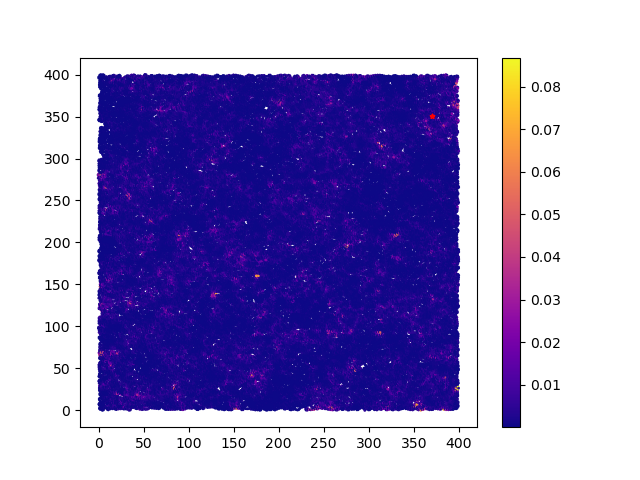

In [11]:
from percolate import plot_cluster, generate_site_list
from qcnico.coords_io import read_xsf

def get_data(run_ind,temp,datadir):
    #nsamples = len(run_inds)
    #ntemps = len(temps)
    sampdir = f"sample-{run_ind}"
    pkl = f"out_percolate-{temp}K.pkl"
    fo = open(path.join(datadir,sampdir,pkl),'rb')
    dat = pickle.load(fo)
    fo.close()
    return dat

tiny_cluster_inds = np.vstack((sizes == 2).nonzero())
print(tiny_cluster_inds)

gr_inds = np.array(gr_inds)

tiny_cluster_structures = gr_inds[np.unique(tiny_cluster_inds[0])]
#print(tiny_cluster_structures)

posdir = path.join(path.dirname(datadir), 'structures')
Mdir = path.join(path.dirname(datadir), 'MOs_ARPACK')
edir = path.join(path.dirname(datadir), 'eARPACK')

for nn in tiny_cluster_structures:
    T_ind = tiny_cluster_inds[1,(tiny_cluster_structures == nn).nonzero()[0][0]]
    print(T_ind)
    posfile = path.join(posdir,f'bigMAC-{nn}_relaxed.xsf')
    Mfile = path.join(Mdir,f'MOs_ARPACK_bigMAC-{nn}.npy')
    efile = path.join(edir, f'eARPACK_bigMAC-{nn}.npy')
    M = np.load(Mfile)
    energies = np.load(efile)
    T = temps[T_ind]
    dat = get_data(nn,T,datadir)
    c = dat[0][0]
    print(c)
    A = dat[2]
    pos, _ = read_xsf(posfile)
    centres, ee, MOinds = generate_site_list(pos, M, energies)
    plot_cluster(c,pos,M,A,show_densities=True, dotsize=1.0, usetex=False, show=True, centers=centres, inds=MOinds,rel_center_size=10.0)

In [17]:
print(np.where(sizes==0))


(array([ 12,  62,  76,  98, 112, 141]), array([11,  4,  0,  9,  4,  3]))


{63, 64, 65, 68, 71, 72, 73, 74, 75, 77, 79, 80, 82, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207}
[[370.1860894  109.91149085]
 [350.154149   149.98921625]
 [270.0263874  149.98921625]
 [ 69.7069834  109.91149085]
 [370.1860894  109.91149085]
 [350.154149   149.98921625]
 [ 49.675043   129.95035355]
 [ 89.7389238  270.22239245]
 [ 49.675043   310.30011785]
 [ 29.6431026  109.91149085]
 [ 89.7389238  250.18352975]
 [ 49.675043   310.30011785]
 [3

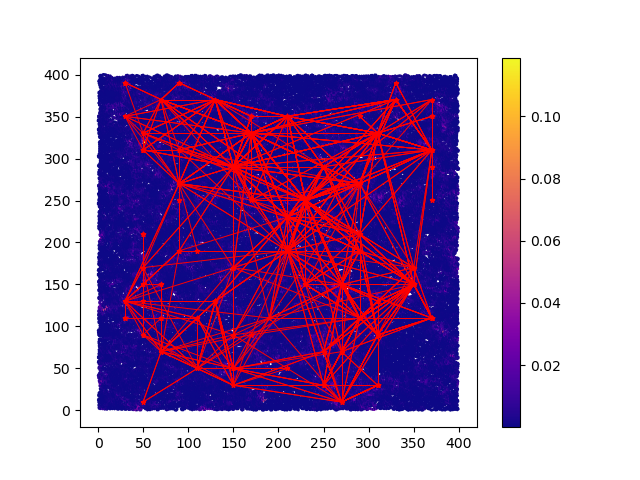

{6, 7, 8, 9, 12, 14, 21, 25, 29, 33, 36, 37, 41, 44, 45, 46, 47, 48, 51, 53, 54, 55, 57, 58, 63, 64, 65, 71, 72, 76, 81, 83, 85, 86, 87, 88, 95, 96, 98, 99, 105, 111, 114, 115, 116, 117, 118, 120, 121, 124, 127, 131, 134, 135, 136, 137, 138, 142, 143, 144, 146, 147, 148, 149, 150, 151, 153, 154, 158, 160, 161, 162, 163, 168, 174, 175, 176, 180, 181, 182, 183, 187, 189, 190, 191, 192, 196, 197, 198, 199, 200, 204, 206}
[[310.0902682  250.18352975]
 [270.0263874   29.75604005]
 [209.9305662  230.14466705]
 [270.0263874  129.95035355]
 [330.1222086  149.98921625]
 [270.0263874  129.95035355]
 [270.0263874  270.22239245]
 [270.0263874  270.22239245]
 [270.0263874  270.22239245]
 [169.8666854  290.26125515]
 [209.9305662  250.18352975]
 [249.994447    69.83376545]
 [249.994447    69.83376545]
 [310.0902682  250.18352975]
 [270.0263874  270.22239245]
 [310.0902682  250.18352975]
 [270.0263874  270.22239245]
 [189.8986258  330.33898055]
 [249.994447   170.02807895]
 [310.0902682  129.95035355

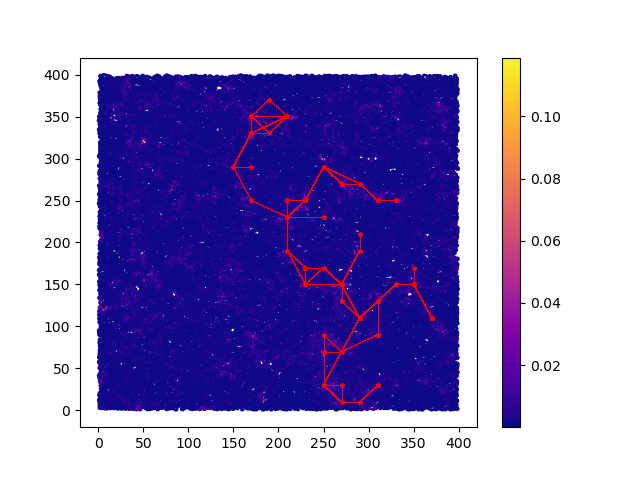

In [18]:
nn = 2
for T in [40,430]:
    posfile = path.join(posdir,f'bigMAC-{nn}_relaxed.xsf')
    Mfile = path.join(Mdir,f'MOs_ARPACK_bigMAC-{nn}.npy')
    efile = path.join(edir, f'eARPACK_bigMAC-{nn}.npy')
    M = np.load(Mfile)
    energies = np.load(efile)
    dat = get_data(nn,T,datadir)
    c = dat[0][0]
    print(c)
    A = dat[2]
    pos, _ = read_xsf(posfile)
    centres, ee, MOinds = generate_site_list(pos, M, energies)
    plot_cluster(c,pos,M,A,show_densities=True, dotsize=1.0, usetex=False, show=True, centers=centres, inds=MOinds,rel_center_size=10.0)

In [23]:
zero_clusters_grT_inds =  np.vstack((sizes == 0).nonzero())

for ii, iT in zero_clusters_grT_inds.T:
    print(f"{gr_inds[ii]}  {temps[iT]}")


25  150
104  80
123  40
161  130
188  80
239  70
